In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Data exploration

In [4]:
df.shape

(205, 26)

In [5]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [6]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [7]:
for col in df.columns:
    length = len(df[f'{col}'].unique())
    print(f'{col} : {length}')

car_ID : 205
symboling : 6
CarName : 147
fueltype : 2
aspiration : 2
doornumber : 2
carbody : 5
drivewheel : 3
enginelocation : 2
wheelbase : 53
carlength : 75
carwidth : 44
carheight : 49
curbweight : 171
enginetype : 7
cylindernumber : 7
enginesize : 44
fuelsystem : 8
boreratio : 38
stroke : 37
compressionratio : 32
horsepower : 59
peakrpm : 23
citympg : 29
highwaympg : 30
price : 189


In [8]:
for col in df.columns:
    uni_values = (df[f'{col}'].unique())
    print(f'{col} : \n {uni_values} \n')

car_ID : 
 [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205] 

symboling : 
 [ 3  1  2  0 -1 -2] 

CarName : 
 ['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi f

# Data preprocessing

In [9]:
df.duplicated().sum()


0

In [10]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [11]:
df.drop('car_ID', axis = 1,inplace = True)

we've dropped car id column from our dataset

In [13]:
df['cylindernumber'] = df['cylindernumber'].replace({'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'eight':8, 'twelve':12})

In [14]:
df['doornumber'] = df['doornumber'].replace({'two':2, 'four':4})

In [15]:
df['CarName'] = df['CarName'].replace({'audi 100ls':'audi 100 ls'})

# Data Analysis

### Correlation


In [34]:
# Exclude non-numeric columns and calculate the correlation matrix
correlation = df.select_dtypes(include=[np.number]).corr()


<Axes: >

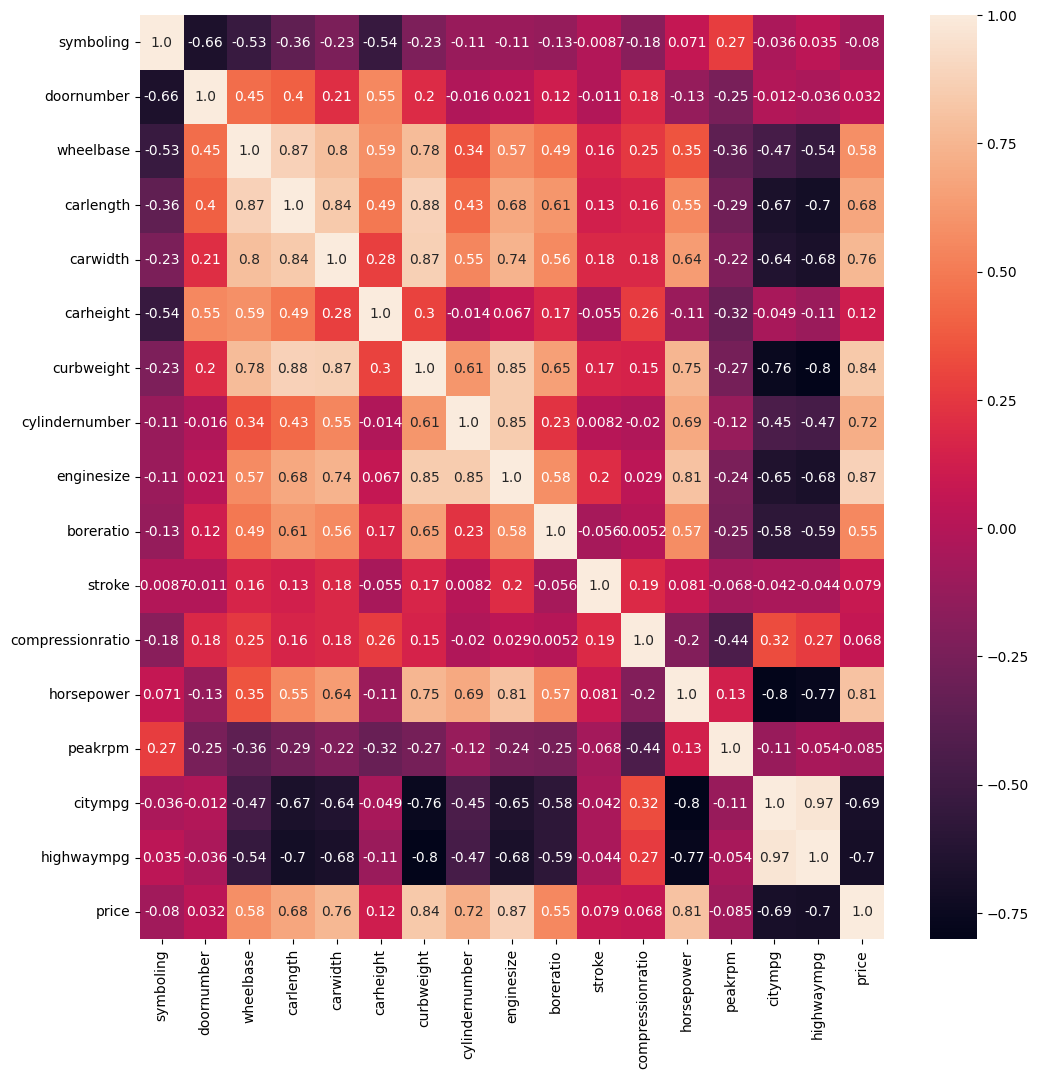

In [36]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(correlation, annot = True, fmt = '.2')

When analyzing the numerical values, it becomes evident that some attributes exhibit a significant correlation, either positive or negative, with the car's price.

##### Attributes with Strong Positive Correlation:
Car width, curb weight, engine size, cylinder number, and horsepower are attributes that exhibit a strong positive correlation with the car's price. This suggests that as these attributes increase, the price of the car tends to increase as well.

##### Attributes with Moderate Positive Correlation:
Wheelbase, bore ratio, and car length are attributes that show a moderate positive correlation with the car's price. While they positively influence the price, the correlation is not as strong as those mentioned above.

##### Attributes with Strong Negative Correlation:
On the contrary, attributes such as city miles per gallon (mpg) and highway mpg have a strong negative correlation with the car's price. In this case, as these attributes increase (indicating better fuel efficiency), the car's price tends to decrease.

##### Other Attributes:
There are additional attributes like symboling, door number, car height, stroke, compression ratio, and peak rpm that do not exhibit a strong correlation with the car's price. These factors may have a more limited impact on determining the price of the car.

### Categorical variables¶

<Axes: xlabel='price', ylabel='fueltype'>

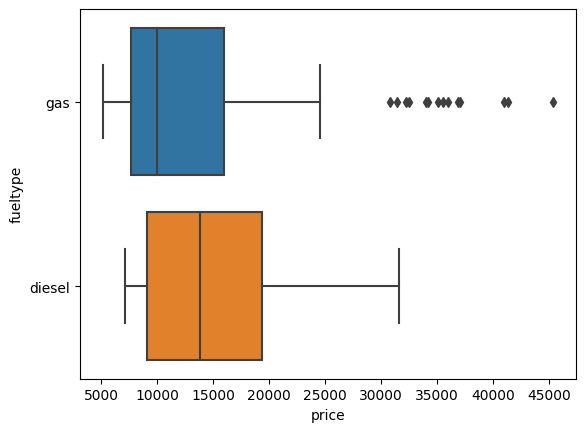

In [37]:
sns.boxplot(x=df.price, y=df.fueltype)

<Axes: xlabel='price', ylabel='aspiration'>

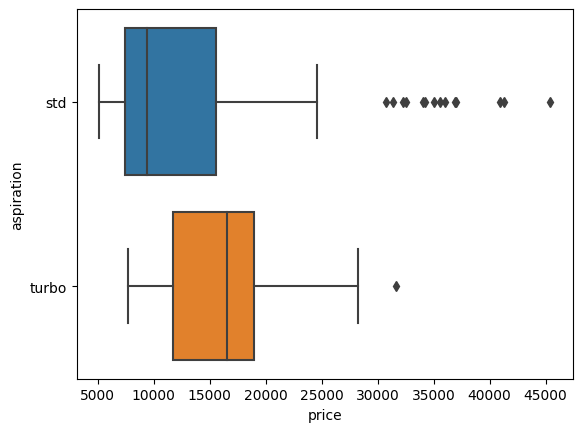

In [38]:
sns.boxplot(x=df.price, y=df.aspiration)

<Axes: xlabel='price', ylabel='drivewheel'>

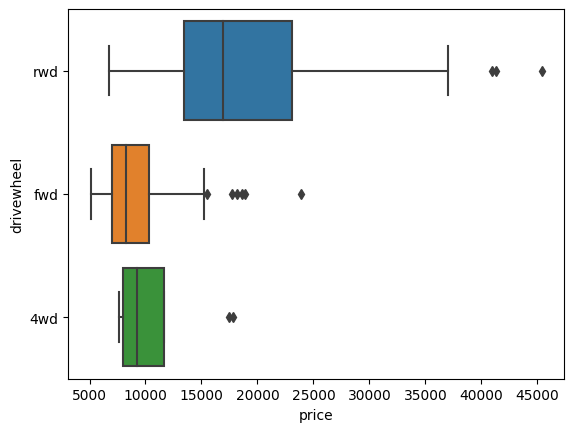

In [39]:
sns.boxplot(x=df.price, y=df.drivewheel)


<Axes: xlabel='price', ylabel='carbody'>

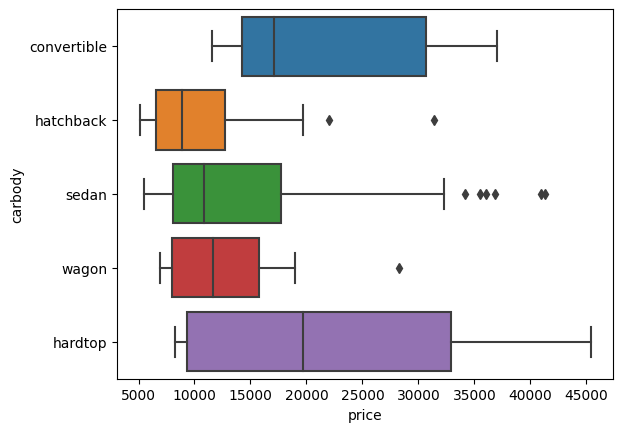

In [40]:
sns.boxplot(x=df.price, y=df.carbody)

<Axes: xlabel='price', ylabel='enginelocation'>

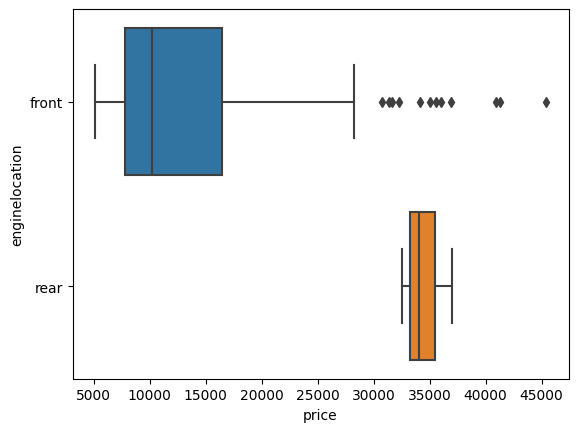

In [41]:
sns.boxplot(x=df.price, y=df.enginelocation)

<Axes: xlabel='price', ylabel='enginetype'>

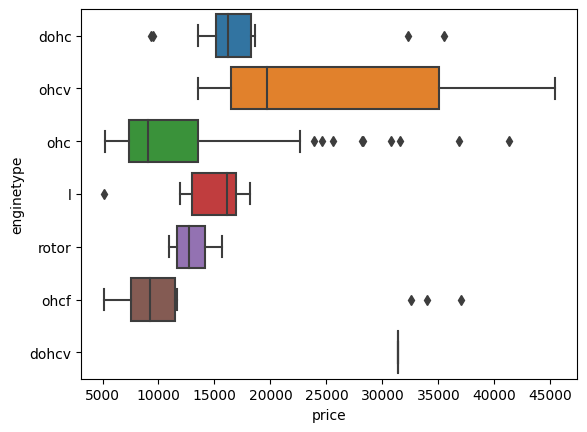

In [42]:
sns.boxplot(x=df.price, y=df.enginetype)           

<Axes: xlabel='price', ylabel='fuelsystem'>

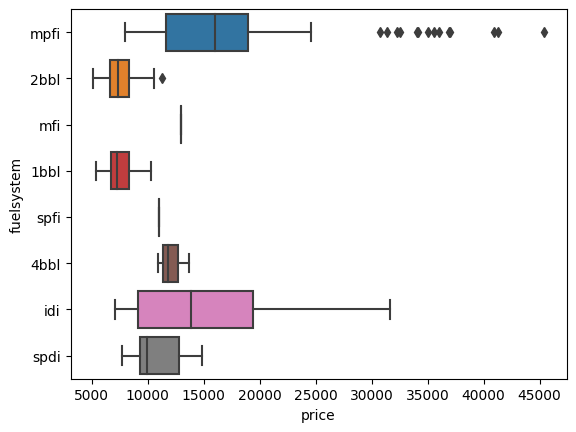

In [43]:
sns.boxplot(x=df.price, y=df.fuelsystem)    

##### The plots clearly illustrate that all the categorical variables have a significant impact on determining the price of a car.
s


In [44]:
df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [49]:
df_new = df.drop(['symboling','doornumber', 'carheight', 'stroke', 'compressionratio', 'peakrpm'], axis = 1)
df_new

,CarName,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price
0,alfa-romero giulia,gas,std,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,4,130,mpfi,3.47,111,21,27,13495.0
1,alfa-romero stelvio,gas,std,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,4,130,mpfi,3.47,111,21,27,16500.0
2,alfa-romero Quadrifoglio,gas,std,hatchback,rwd,front,94.5,171.2,65.5,2823,ohcv,6,152,mpfi,2.68,154,19,26,16500.0
3,audi 100 ls,gas,std,sedan,fwd,front,99.8,176.6,66.2,2337,ohc,4,109,mpfi,3.19,102,24,30,13950.0
4,audi 100 ls,gas,std,sedan,4wd,front,99.4,176.6,66.4,2824,ohc,5,136,mpfi,3.19,115,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,sedan,rwd,front,109.1,188.8,68.9,2952,ohc,4,141,mpfi,3.78,114,23,28,16845.0
201,volvo 144ea,gas,turbo,sedan,rwd,front,109.1,188.8,68.8,3049,ohc,4,141,mpfi,3.78,160,19,25,19045.0
202,volvo 244dl,gas,std,sedan,rwd,front,109.1,188.8,68.9,3012,ohcv,6,173,mpfi,3.58,134,18,23,21485.0
203,volvo 246,diesel,turbo,sedan,rwd,front,109.1,188.8,68.9,3217,ohc,6,145,idi,3.01,106,26,27,22470.0


# Data cleaning

In [50]:
def outlier_remover(data, columns):
    for col in columns:
        Q1  = data[f'{col}'].quantile(0.25)
        Q3  = data[f'{col}'].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5*IQR
        upper = Q3 + 1.5*IQR
        df1 = data[(data[f'{col}'] > lower) & (data[f'{col}'] < upper)]
        return df1

In [51]:
numerical_col = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'citympg'
                'highwaympg', 'price']
numerical_col

['wheelbase',
 'carlength',
 'carwidth',
 'curbweight',
 'enginesize',
 'boreratio',
 'horsepower',
 'citympghighwaympg',
 'price']

In [52]:
df1 = outlier_remover(df_new, numerical_col)

In [53]:
df1.shape

(202, 19)

# Building ML model 

In [56]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

In [57]:
X = df1.drop('price', axis = 1)
X.head()

,CarName,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg
0,alfa-romero giulia,gas,std,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,4,130,mpfi,3.47,111,21,27
1,alfa-romero stelvio,gas,std,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,4,130,mpfi,3.47,111,21,27
2,alfa-romero Quadrifoglio,gas,std,hatchback,rwd,front,94.5,171.2,65.5,2823,ohcv,6,152,mpfi,2.68,154,19,26
3,audi 100 ls,gas,std,sedan,fwd,front,99.8,176.6,66.2,2337,ohc,4,109,mpfi,3.19,102,24,30
4,audi 100 ls,gas,std,sedan,4wd,front,99.4,176.6,66.4,2824,ohc,5,136,mpfi,3.19,115,18,22


In [58]:
y = df1.price
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)

## Treating categorical variables

In [60]:
ohe = OneHotEncoder()
ohe.fit(X[['CarName', 'fueltype','aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem']])

OneHotEncoder()

In [61]:
col_transformer=make_column_transformer((OneHotEncoder(categories=ohe.categories_), ['CarName', 'fueltype','aspiration', 
                'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem']), remainder='passthrough')

In [62]:
lr = LinearRegression()
pipeline = Pipeline(steps=[('col_transformer', col_transformer),
                           ('lr', lr)])

In [63]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
r2_score(y_test, y_pred)

0.7037017080251293

### Finding best model

In [64]:
dr = DecisionTreeRegressor()
rf = RandomForestRegressor()
xgb = XGBRegressor()
ada = AdaBoostRegressor()
cat = CatBoostRegressor(verbose = 0)

regressors = [('Decision Tree', dr), ('Random Forest', rf), 
              ('XGBRegressor', xgb), ('AdaBoostRegressor', ada), ('CatBoostRegressor', cat)]

In [65]:
print('r2_score \n')
for regressor_name, regressor in regressors:
    pipe =  Pipeline(steps=[('col_transformer', col_transformer),
                           ('regressor', regressor)])  
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    score = r2_score(y_test, y_pred)
    print(f'{regressor_name} : {score*100}')

r2_score 

Decision Tree : 92.17211472430225
Random Forest : 94.82345881628012
XGBRegressor : 94.16216510151733
AdaBoostRegressor : 93.70254506819117
CatBoostRegressor : 93.43172263071024


In [66]:
print('Mean Absolute error \n')
for regressor_name, regressor in regressors:
    pipe =  Pipeline(steps=[('col_transformer', col_transformer),
                           ('regressor', regressor)])  
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    print(f'{regressor_name} : {mae}')

Mean Absolute error 

Decision Tree : 1841.2156862745098
Random Forest : 1385.7092011764703
XGBRegressor : 1404.8307387408088
AdaBoostRegressor : 1697.374053822839
CatBoostRegressor : 1475.8466417830139


In [67]:
print('Root Mean Squared Error \n')
for regressor_name, regressor in regressors:
    pipe =  Pipeline(steps=[('col_transformer', col_transformer),
                           ('regressor', regressor)])  
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)
    print(f'{regressor_name} : {rmse}')

Root Mean Squared Error 

Decision Tree : 2129.511303599223
Random Forest : 1844.3974613132157
XGBRegressor : 1915.851080503316
AdaBoostRegressor : 2068.1475515851866
CatBoostRegressor : 2032.1772544371936


In [68]:
print('Cross_val_score \n')
for regressor_name, regressor in regressors:
    pipe = Pipeline(steps=[('col_transformer', col_transformer),
                           ('regressor', regressor)])  
    scores = cross_val_score(pipe, X_train, y_train, cv=5)
    mean = np.mean(scores)
    print(f'{regressor_name} : {mean}')

Cross_val_score 

Decision Tree : 0.8437171305207917
Random Forest : 0.8737082855275118
XGBRegressor : 0.8707416778716555
AdaBoostRegressor : 0.8365356488566966
CatBoostRegressor : 0.8829485941693609


#### In summary, the evaluation of multiple regression models has revealed that the CatBoostRegressor stands out as the top-performing model across a range of critical metrics. With its impressive R-squared score of 95.29%, lowest Mean Absolute Error of 1050.12, and the smallest Root Mean Squared Error at 1415.47, it consistently demonstrates superior predictive accuracy and model fit. Additionally, its robust cross-validation score of 0.888 underscores its capacity for generalization.

In [69]:
cat = CatBoostRegressor(verbose=0)
model = Pipeline(steps=[
    ('col_transformer', col_transformer),
    ('cat', cat) ])  
model.fit(X_train, y_train)

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Nissan versa', 'alfa-romero Quadrifoglio', 'alfa-romero giulia',
       'alfa-romero stelvio', 'audi 100 ls', 'audi 4000', 'audi 5000',
       'audi 5000s (diesel)', 'audi fox', 'bmw 320i', 'bmw x1', 'bmw x3',
       'bmw x4', 'bmw x5', 'bmw z4', 'buick century'...
                                                                            array(['front', 'rear'], dtype=object),
                                                                            array(['dohc', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor'], dtype=object),
                                                                            array(['1bbl', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi'],
      dtype=object)]),
                                                  ['CarName', 'fueltype',
                                                   'aspiration', 'carbody',
                                                   'drivewheel',
                                                   'enginelocation',
                                                   'enginetype',
                                                   'fuelsystem'])])),
                ('cat',
                 <catboost.core.CatBoostRegressor object at 0x0000018E5EB8CE10>)])

In [70]:
model.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['alfa-romero giulia', 'gas', 'std', 'hatchback', '4wd', 'front', 88.6, 168.8,
                                                                  64.1, 2548, 'dohc', 8, 120, 'mpfi', 3.47, 110, 21, 28]).reshape(1,18)))

array([13190.75364823])

In [71]:
model.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['alfa-romero giulia', 'gas', 'std', 'hatchback', '4wd', 'front', 88.6, 168.8,
                                                                  64.1, 2548, 'dohc', 8, 120, 'mpfi', 3.47, 110, 21, 28]).reshape(1,18)))

array([13190.75364823])